Use the “two circles” and see how the performance of the LDA method performed on the data transformed with the kPCA method will change depending on the value of the parameter γ.

In [12]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

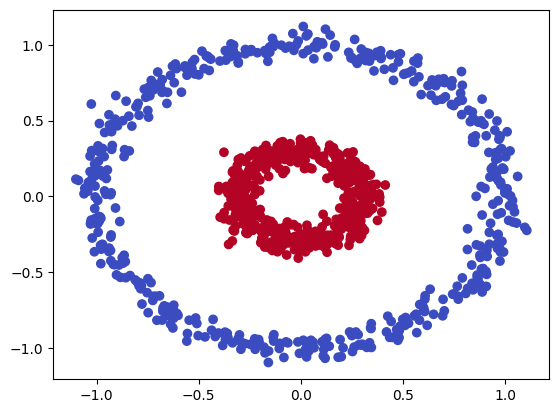

In [13]:
#creating circle-shaped data
data, target = make_circles(n_samples=1_000, factor = 0.3, noise = 0.05)
plt.scatter(data[:,0], data[:,1], c = target, cmap=plt.cm.coolwarm)

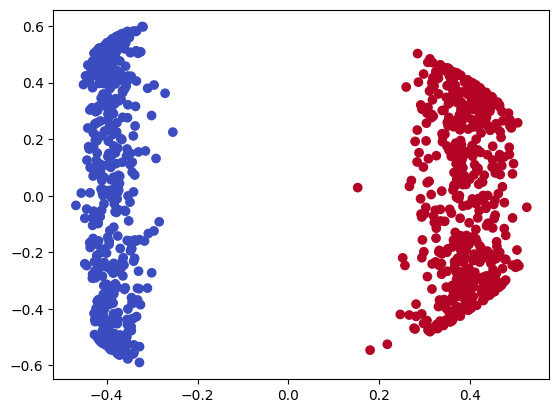

In [14]:
# testing kPCA
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=2)

data_kpca = kernel_pca.fit_transform(data)
plt.scatter(data_kpca[:, 0], data_kpca[:, 1], c = target, cmap=plt.cm.coolwarm)

In [15]:
# testing gamma parameter 1-1.8
gamma=np.arange(1,1.8,0.02)

In [16]:
acc_1=[]
acc_2=[]
acc_3=[]
lda = LinearDiscriminantAnalysis()
for i in gamma:
    kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=i)
    data_kpca = kernel_pca.fit_transform(data)
    # creating dataset based on 1/2/3 columns
    X1 =data_kpca[:, [0, 0]] 
    X2 =data_kpca[:, [0, 1]] 
    X3 =data_kpca[:, [0, 2]] 
    X=[X1,X2,X3]
    #testing model for all 3 datasets
    for x in X:
        lda.fit(x, target)
        data_comp = pd.DataFrame({'org': target, 'pred': lda.predict(x)})
        accuracy = accuracy_score(data_comp.org, data_comp.pred)
        if np.array_equal(x, X1):
            acc_1.append(accuracy)
        elif np.array_equal(x, X2):
            acc_2.append(accuracy)
        elif np.array_equal(x, X3):
            acc_3.append(accuracy)

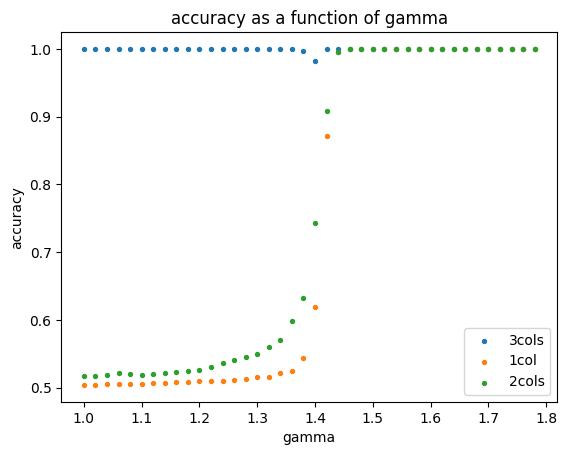

In [17]:
plt.scatter(gamma, acc_3, label='3cols', s=8)
plt.scatter(gamma, acc_1, label='1col', s=8)
plt.scatter(gamma, acc_2, label='2cols', s=8)
plt.title('accuracy as a function of gamma')
plt.ylabel('accuracy')
plt.xlabel('gamma')
plt.legend()

result: for datasets with 1/2 columns results are the best with gamma > 1.4
dataset based on 3 columns always gives good results